# <FONT SIZE=5 COLOR="purple"> **Aplicación Clustering - Entrega Final Machine learning** </FONT>

- Buscar un conjunto de datos (>2000 registros) al cuál se le pueda aplicar algoritmos de clustering. Es decir, que se busque hacer clusters para analizar.

- Explorar los datos

- Aplicar kmeans

- Analizar los clusters obtenidos.

# <FONT SIZE=5 COLOR="purple"> **Carga de los datos desde kaggle - Loan_approval_data_2025** </FONT>

los datos fueron obtenidos de [Este link](https://www.kaggle.com/datasets/vrindakallu/new-york-dataset)

In [31]:
path = kagglehub.dataset_download("vrindakallu/new-york-dataset")
print(path)


Using Colab cache for faster access to the 'new-york-dataset' dataset.
/kaggle/input/new-york-dataset


In [ ]:
for f in os.listdir(path):
  print(f)

new_york_listings_2024.csv


In [ ]:
df_airbnb = pd.read_csv(path + "/new_york_listings_2024.csv")
df_airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,rating,bedrooms,beds,baths
0,1312228,Rental unit in Brooklyn · ★5.0 · 1 bedroom,7130382,Walter,Brooklyn,Clinton Hill,40.683710,-73.964610,Private room,55.0,...,2015-12-20,0.03,1,0,0,No License,5.0,1,1,Not specified
1,45277537,Rental unit in New York · ★4.67 · 2 bedrooms ·...,51501835,Jeniffer,Manhattan,Hell's Kitchen,40.766610,-73.988100,Entire home/apt,144.0,...,2023-05-01,0.24,139,364,2,No License,4.67,2,1,1
2,971353993633883038,Rental unit in New York · ★4.17 · 1 bedroom · ...,528871354,Joshua,Manhattan,Chelsea,40.750764,-73.994605,Entire home/apt,187.0,...,2023-12-18,1.67,1,343,6,Exempt,4.17,1,2,1
3,3857863,Rental unit in New York · ★4.64 · 1 bedroom · ...,19902271,John And Catherine,Manhattan,Washington Heights,40.835600,-73.942500,Private room,120.0,...,2023-09-17,1.38,2,363,12,No License,4.64,1,1,1
4,40896611,Condo in New York · ★4.91 · Studio · 1 bed · 1...,61391963,Stay With Vibe,Manhattan,Murray Hill,40.751120,-73.978600,Entire home/apt,85.0,...,2023-12-03,0.24,133,335,3,No License,4.91,Studio,1,1


In [ ]:
df_airbnb_final = df_airbnb.drop(["id", "name", "host_name", "last_review"], axis = 1)

# <FONT SIZE=5 COLOR="purple"> **Carga de las librerias necesarias** </FONT>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import plotly.express as px

import pandas as pd
import numpy as np
from sklearn.metrics import pairwise_distances

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
import plotly.express as px
import numpy as np

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import numpy as np

# <FONT SIZE=5 COLOR="purple"> **Exploración de los datos** </FONT>

Tenemos las siguientes variables.

- host_id: Identificador único del anfitrión (host).
- neighbourhood_group: Región o grupo principal de vecindarios del listado.
- neighbourhood: Nombre específico del vecindario donde se ubica el listado.
- latitude: Latitud geográfica de la ubicación del listado.
- longitude: Longitud geográfica de la ubicación del listado.
- room_type: Tipo de alojamiento ofrecido (Apartamento/Casa entera, Habitación privada, etc.).
- price: Precio por noche de la reserva.
- minimum_nights: Número mínimo de noches requeridas para reservar.
- number_of_reviews: Número total de comentarios/reseñas que ha recibido el listado.
- reviews_per_month: Promedio de reseñas recibidas por mes.
- calculated_host_listings_count: Número total de listados que el anfitrión tiene en la ciudad.
- availability_365: Número de días en el próximo año que el listado está disponible.
- number_of_reviews_ltm: Número de reseñas recibidas en los últimos 12 meses.
- license: Información o estado de la licencia del listado.
- rating: Calificación general del listado.
- bedrooms: Número de dormitorios disponibles.
- beds: Número de camas disponibles.
- baths: Número de baños disponibles.

In [ ]:
print("Los datos tienen " + str(df_airbnb_final.shape[0]) + " ovservaciones y " + str(df_airbnb_final.shape[1]) + " variables \n")

print(f"Los tipos de datos en las son las siguientes: \n{df_airbnb_final.dtypes} \n")

print("Verificamos si hay datos faltantes:")
print(df_airbnb_final.isna().sum(), "\n")

print("Ahora analizaremos sus estadísticas descriptivas:")
round(df_airbnb_final.describe(), 3)

Los datos tienen 20758 ovservaciones y 18 variables 

Los tipos de datos en las son las siguientes: 
host_id                             int64
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                             float64
minimum_nights                      int64
number_of_reviews                   int64
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
rating                             object
bedrooms                           object
beds                                int64
baths                              object
dtype: object 

Verificamos si hay datos faltantes:
host_id                           0
neighbourhood_group               0
neighbourhood      

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,beds
count,2.075800e+04,20758.000,20758.000,20758.000,20758.000,20758.000,20758.000,20758.000,20758.000,20758.000,20758.000
mean,1.749316e+08,40.727,-73.939,187.777,28.558,42.643,1.258,18.844,205.990,10.852,1.724
std,1.725541e+08,0.060,0.061,1022.797,33.537,73.562,1.905,70.911,135.088,21.357,1.212
min,1.678000e+03,40.500,-74.250,10.000,1.000,1.000,0.010,1.000,0.000,0.000,1.000
25%,2.041738e+07,40.684,-73.981,80.000,30.000,4.000,0.210,1.000,87.000,1.000,1.000
50%,1.087271e+08,40.723,-73.950,125.000,30.000,14.000,0.650,2.000,215.000,3.000,1.000
75%,3.144102e+08,40.763,-73.917,199.000,30.000,49.000,1.800,5.000,353.000,15.000,2.000
max,5.504035e+08,40.911,-73.714,100000.000,1250.000,1865.000,75.490,713.000,365.000,1075.000,42.000


Tenemos un costo medio por noche de 187 usd por noceh en la ciudad de Nueva York. Hay lugares que ofrecen una estancia minima de 1 noche o de 1250 noches para estancias mas largas. el promedio de reseñas por mes es de 1

VAamo a hacer el siguiente recorte de variables numericas, para que el cluster que ejecutemos se base mas en un analisis de las propiedades de la ciudad

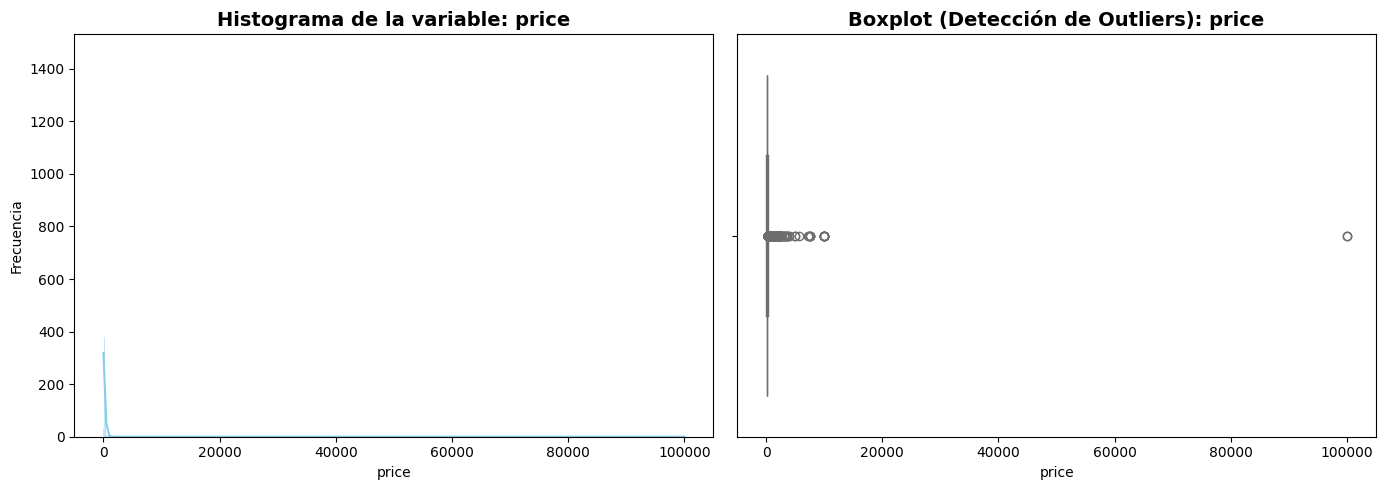

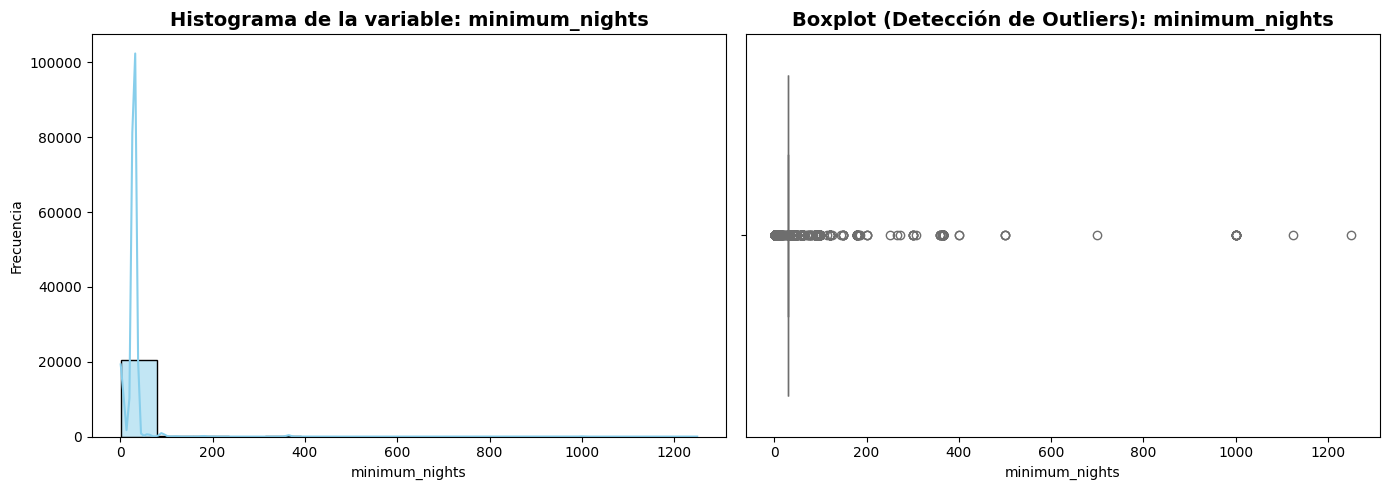

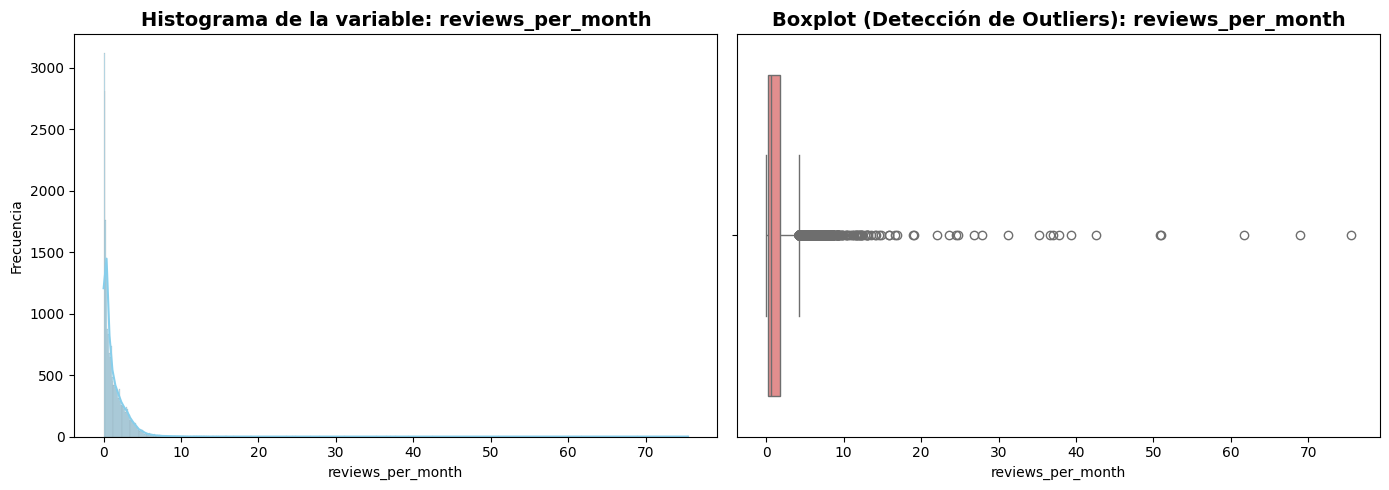

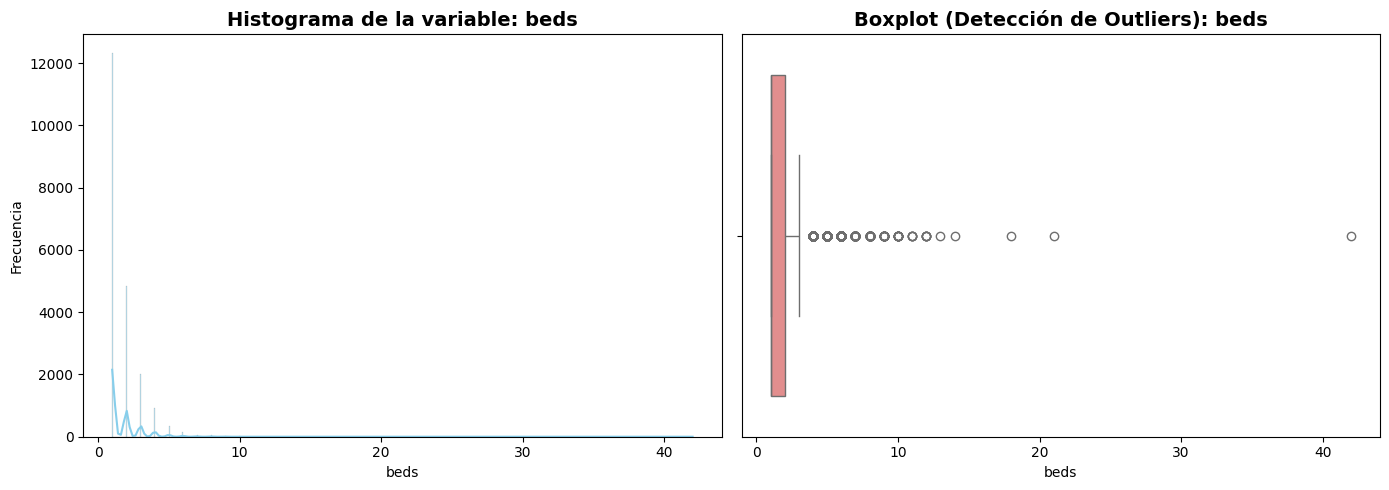

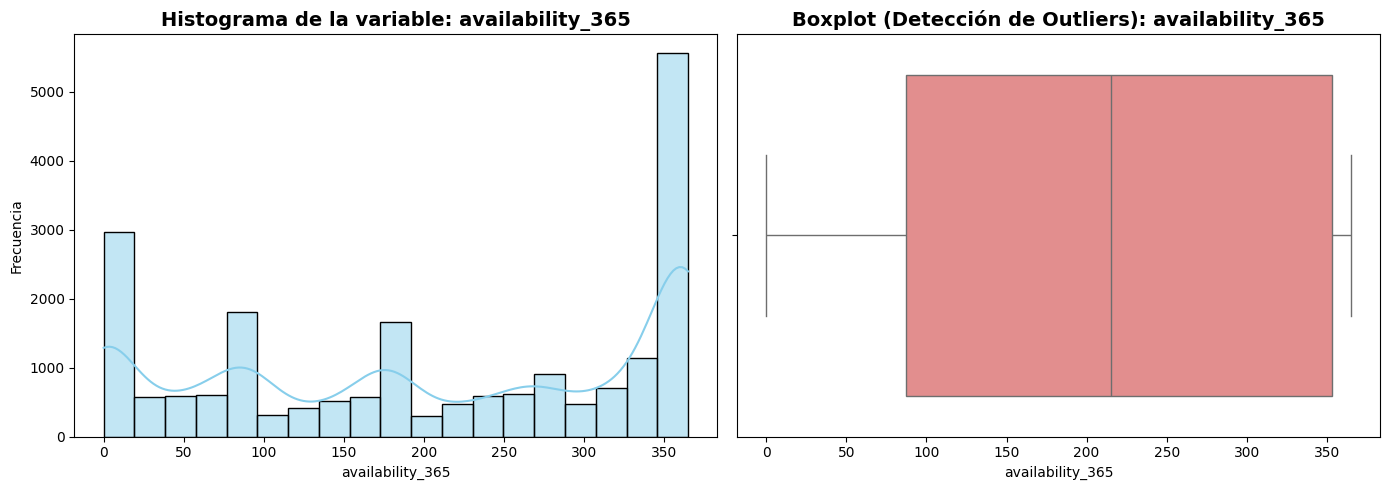

In [ ]:
variables_clustering_num = [
    'price',
    'minimum_nights',
    'reviews_per_month',
    'beds',
    'availability_365'
]

for col in variables_clustering_num:
    if col in df_airbnb_final.columns:

        fig, axes = plt.subplots(1, 2, figsize=(14, 5))

        sns.histplot(df_airbnb_final[col], kde=True, ax=axes[0], color='skyblue')
        axes[0].set_title(f'Histograma de la variable: {col}', fontsize=14, fontweight='bold')
        axes[0].set_xlabel(col)
        axes[0].set_ylabel('Frecuencia')

        sns.boxplot(x=df_airbnb_final[col], ax=axes[1], color='lightcoral')
        axes[1].set_title(f'Boxplot (Detección de Outliers): {col}', fontsize=14, fontweight='bold')
        axes[1].set_xlabel(col)

        plt.tight_layout()

        plt.show()

        print("\n")
    else:
        print(f"Advertencia: La columna '{col}' no se encontró en el DataFrame.")

Podemos ver que la disponibilidad en el año de las propiedades cuenta con ciertos picos de frecuencas al rededor de 365 dias del año. tambien hay picos menos frecuentes entre 180 días, 90 y menos de 20.

Por otro lado vemos que el resto de variables cuentan con sus datos concentrados al ladi izquiero de la frecuencia y de los boxblots, pero hay una propiedad que es la mas lujosa, la mas costosa, tiene muchos, baños, habitaciiones y demas.

/tmp/ipython-input-88329478.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


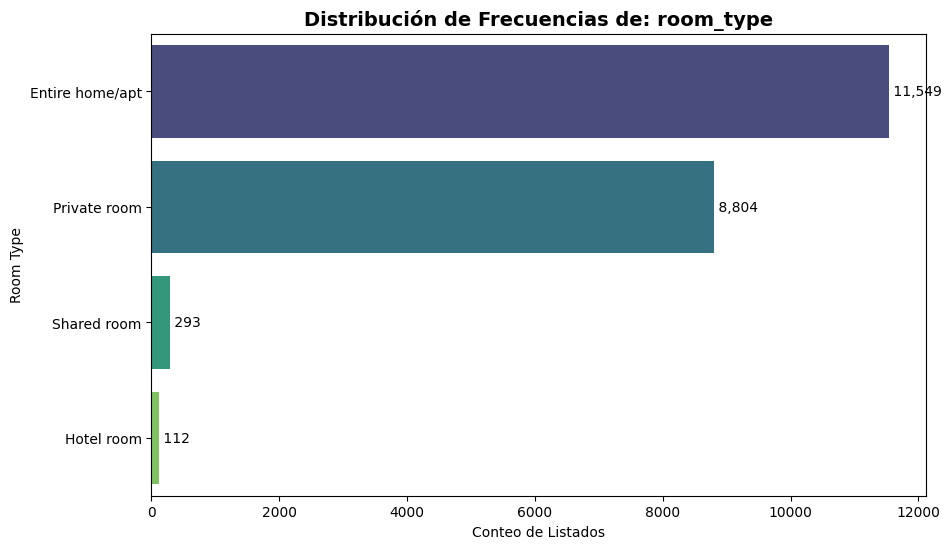

/tmp/ipython-input-88329478.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


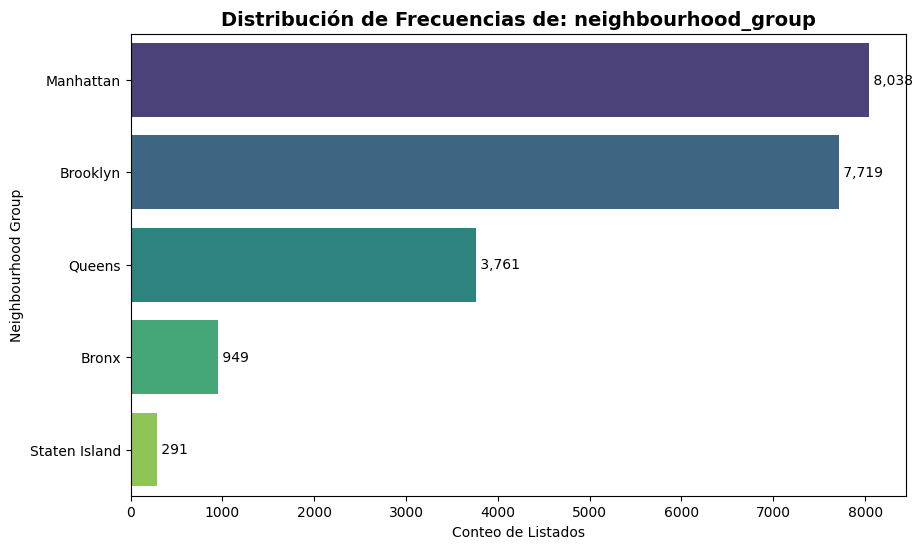

In [ ]:
variables_categoricas = ['room_type', 'neighbourhood_group']

for col in variables_categoricas:

    plt.figure(figsize=(10, 6))
    sns.countplot(
        data=df_airbnb_final,
        y=col,
        order=df_airbnb_final[col].value_counts().index,
        palette='viridis'
    )

    plt.title(f'Distribución de Frecuencias de: {col}', fontsize=14, fontweight='bold')
    plt.xlabel('Conteo de Listados')
    plt.ylabel(col.replace('_', ' ').title())

    for index, value in enumerate(df_airbnb_final[col].value_counts()):
        plt.text(value, index, f' {value:,}', va='center')

    plt.show()
    print("\n")

Viendo los histogramas de frecuencias de los tipos de propiedades ofertadas en Nueva York se puede ver que la mayoría son propiedades completas, también en gran cantidad tenemos habitaciones privadas, la que menos se renta por Airbnb son habitaciones de hotel.

Por otro lado, el barrio el cual tiene mas propiedades registradas es Manhattan, seguido de Brooklyn. En la lista cierran barrios menos exclusivos como lo son staten island y el bronx

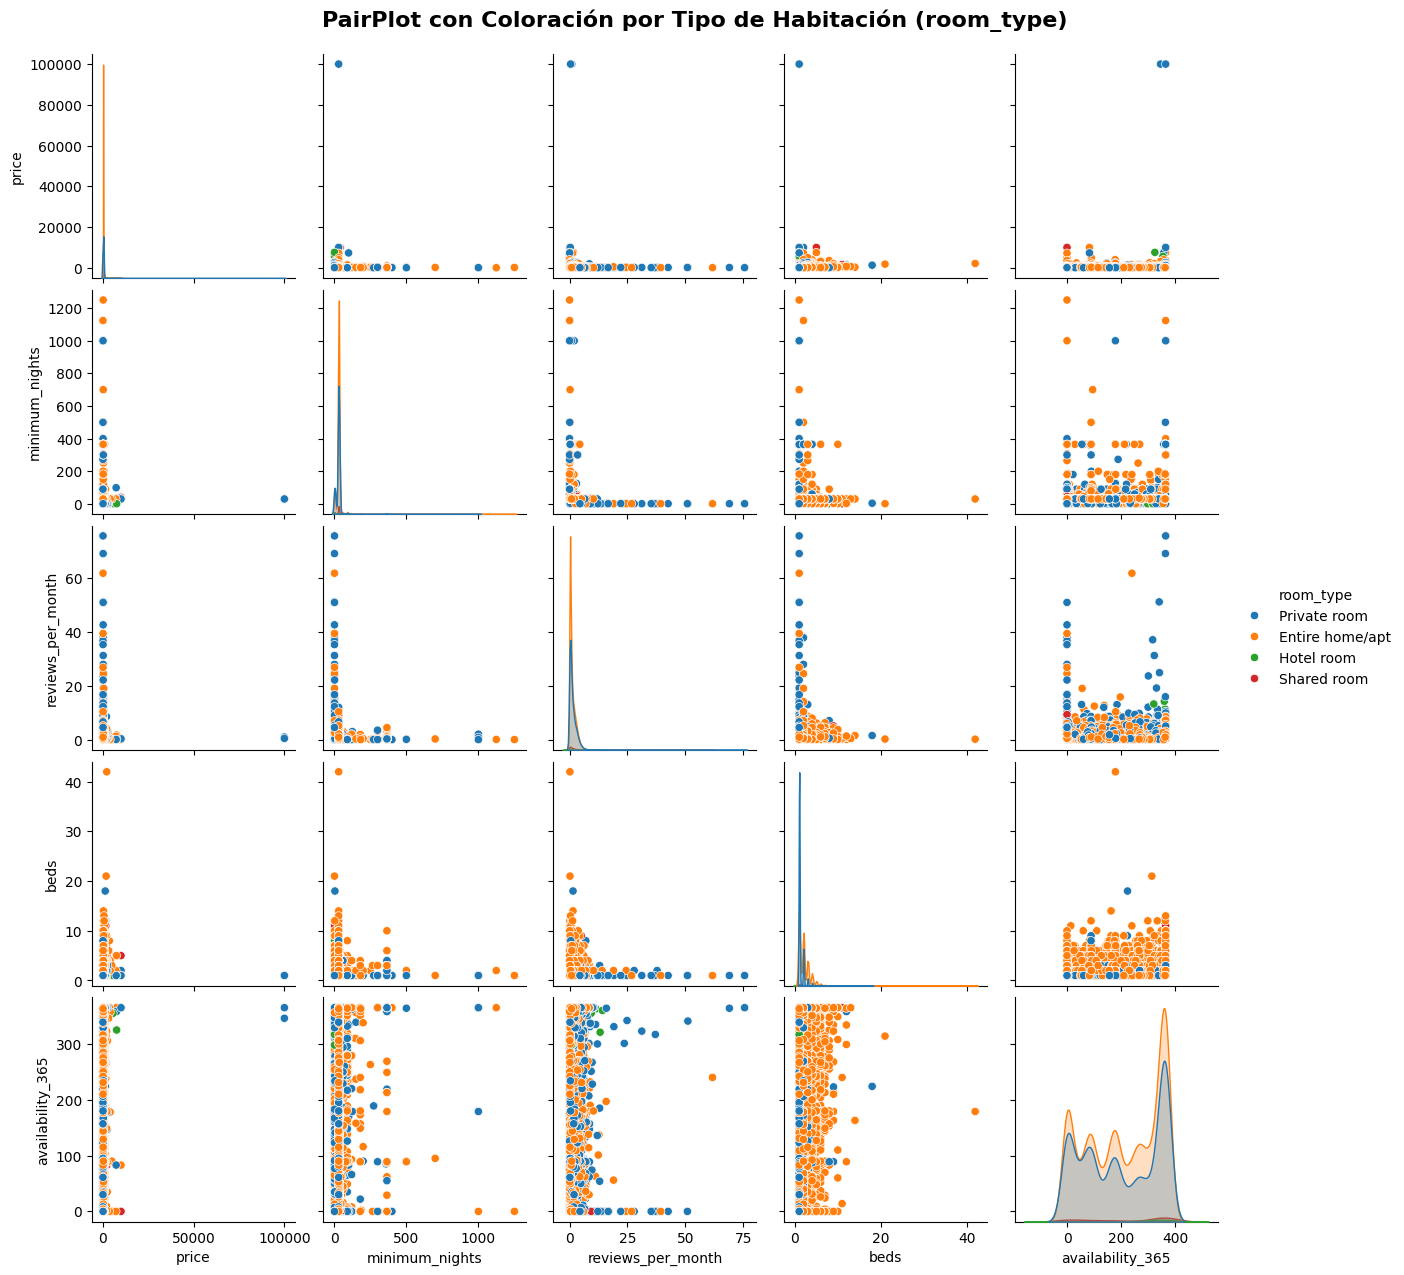

In [ ]:
variables_pairplot_rt = [
    'price',
    'minimum_nights',
    'reviews_per_month',
    'beds',
    'availability_365',
    'room_type' # Añadimos la variable categórica
]

datos_cluster_plot_rt = df_airbnb_final[variables_pairplot_rt].copy()

sns.pairplot(
    data=datos_cluster_plot_rt,
    hue='room_type', # Colorea los puntos según el tipo de habitación
    diag_kind='kde'
)

plt.suptitle('PairPlot con Coloración por Tipo de Habitación (room_type)', y=1.02, fontsize=16, fontweight='bold')
plt.show()

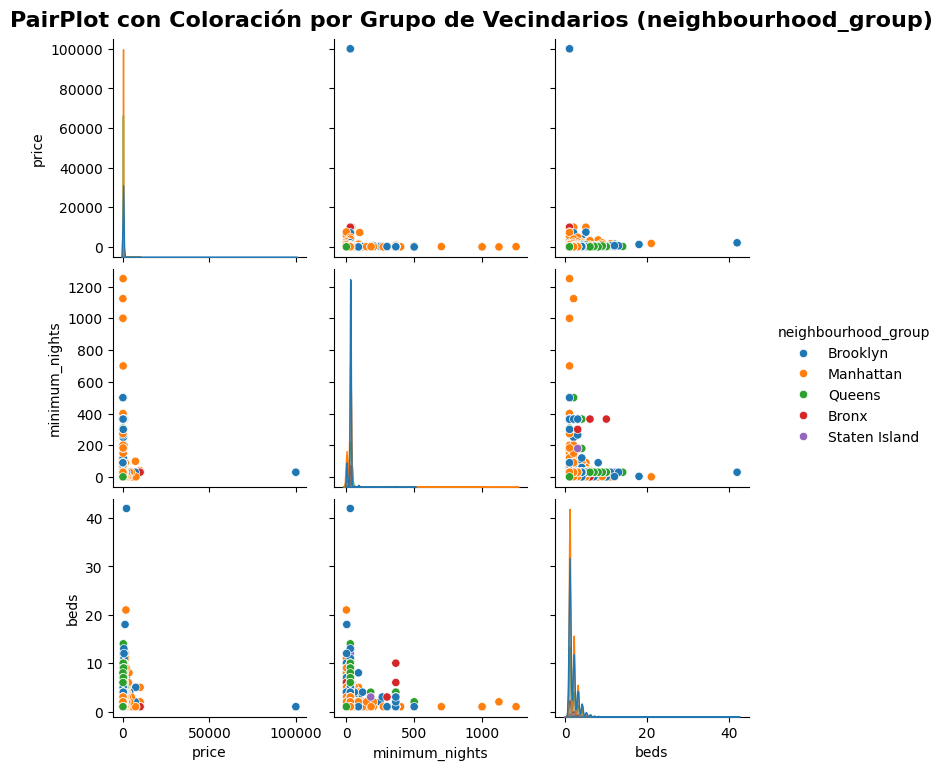

In [ ]:
variables_pairplot_ng = [
    'price',
    'minimum_nights',
    'beds',
    'neighbourhood_group'
]

datos_cluster_plot_ng = df_airbnb_final[variables_pairplot_ng].copy()

sns.pairplot(
    data=datos_cluster_plot_ng,
    hue='neighbourhood_group',
    diag_kind='kde'
)

plt.suptitle('PairPlot con Coloración por Grupo de Vecindarios (neighbourhood_group)', y=1.02, fontsize=16, fontweight='bold')
plt.show()

En los anteriores pairplots no se pudieron identificar muy bien posibles clusters, asi que vamos a mirarlos y hacer motodo del codo para poder obtener un puen cluster

# <FONT SIZE=5 COLOR="purple"> **Preparación de los datos para Kmeans** </FONT>

In [ ]:
NUMERIC_COLS = [
    'price',
    'minimum_nights',
    'beds',
]

CATEGORICAL_COLS = [
    'neighbourhood_group'
]

imputer = SimpleImputer(strategy='mean')
df_airbnb_final[NUMERIC_COLS] = imputer.fit_transform(df_airbnb_final[NUMERIC_COLS])

X_categorical_encoded = pd.get_dummies(
    df_airbnb_final[CATEGORICAL_COLS],
    prefix=CATEGORICAL_COLS,
    drop_first=True
)

X_full = pd.concat(
    [df_airbnb_final[NUMERIC_COLS], X_categorical_encoded],
    axis=1
)

scaler = StandardScaler()

X_airbnb_scaled_array = scaler.fit_transform(X_full)


X_airbnb_scaled = pd.DataFrame(
    X_airbnb_scaled_array,
    columns=X_full.columns
)

Realizamos el ajuste a la dimensionalidad y escalado de las variables categoricas, ya que sin esto, el clustering no tendira forma de hacerse

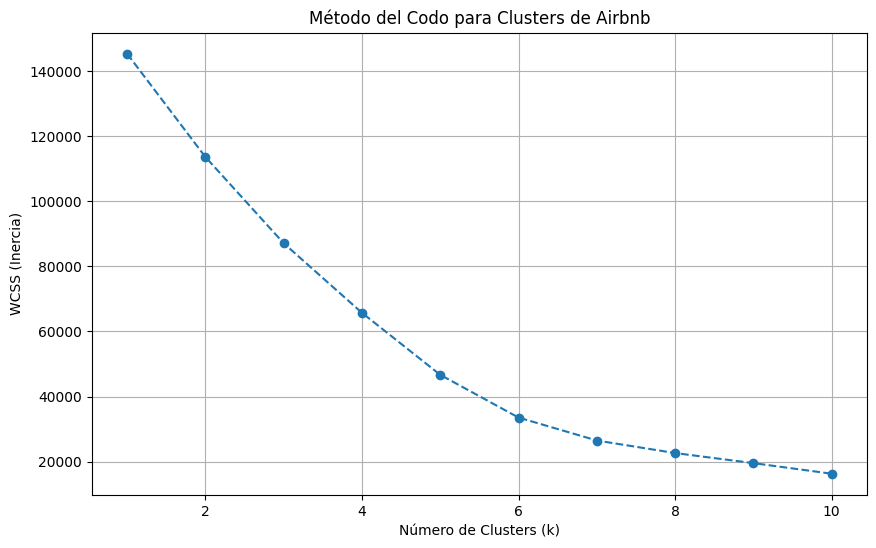

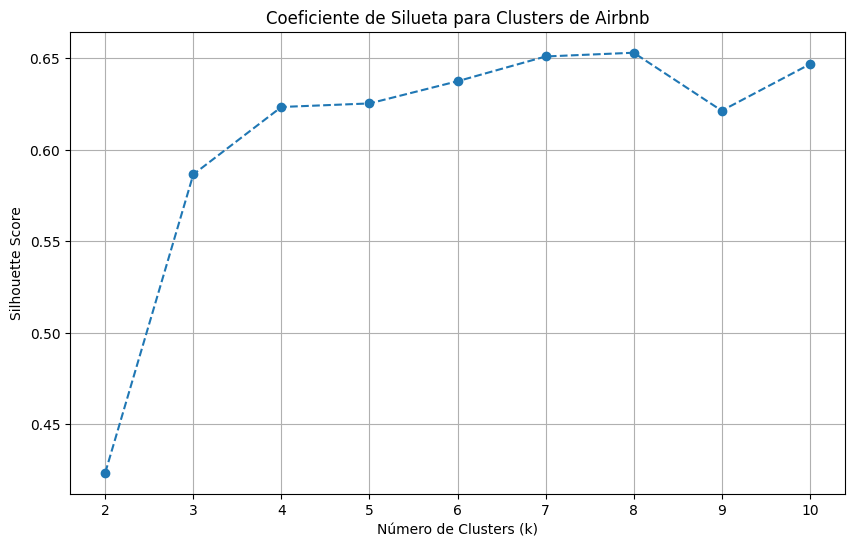

In [ ]:
wcss_airbnb = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
    kmeans.fit(X_airbnb_scaled)
    wcss_airbnb.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_range, wcss_airbnb, marker='o', linestyle='--')
plt.title('Método del Codo para Clusters de Airbnb')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('WCSS (Inercia)')
plt.grid(True)
plt.show()

sil_scores_airbnb = []
k_range_sil = range(2, 11)

for k in k_range_sil:
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
    kmeans.fit(X_airbnb_scaled)
    score = silhouette_score(X_airbnb_scaled, kmeans.labels_)
    sil_scores_airbnb.append(score)

plt.figure(figsize=(10, 6))
plt.plot(k_range_sil, sil_scores_airbnb, marker='o', linestyle='--')
plt.title('Coeficiente de Silueta para Clusters de Airbnb')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

Dado el analisis del metodo del codo y el coeficientes de silueta se van a usar 6 clusters para la composición de los clusters

# <FONT SIZE=5 COLOR="purple"> **Aplicar Kmeans** </FONT>

In [ ]:
k_optimizado = 6


kmeans_final = KMeans(n_clusters=k_optimizado, init='k-means++', n_init=10, random_state=42)
kmeans_final.fit(X_airbnb_scaled)


df_airbnb_final['Cluster'] = kmeans_final.labels_

print("Ejemplo de las primeras 5 filas con la nueva columna 'Cluster':")
print(df_airbnb_final[['price', 'room_type', 'neighbourhood_group', 'Cluster']].head())

print("\nConteo de elementos por Cluster:")

cluster_counts = df_airbnb_final['Cluster'].value_counts().sort_index()
print(cluster_counts)

Ejemplo de las primeras 5 filas con la nueva columna 'Cluster':
   price        room_type neighbourhood_group  Cluster
0   55.0     Private room            Brooklyn        0
1  144.0  Entire home/apt           Manhattan        1
2  187.0  Entire home/apt           Manhattan        1
3  120.0     Private room           Manhattan        1
4   85.0  Entire home/apt           Manhattan        1

Conteo de elementos por Cluster:
Cluster
0    7693
1    8947
2    3743
3     291
4       2
5      82
Name: count, dtype: int64


# <FONT SIZE=5 COLOR="purple"> **Analisis de los clusters** </FONT>

Boxplots para cada variable numérica separados por Clusters (k=7)
------------------------------------------------------------


/tmp/ipython-input-1697992055.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_airbnb_final, x='Cluster', y=col, palette='tab10')


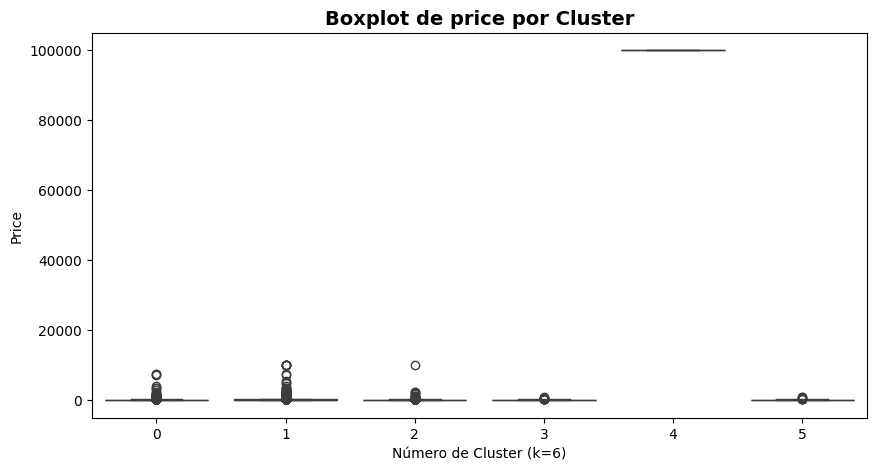

/tmp/ipython-input-1697992055.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_airbnb_final, x='Cluster', y=col, palette='tab10')


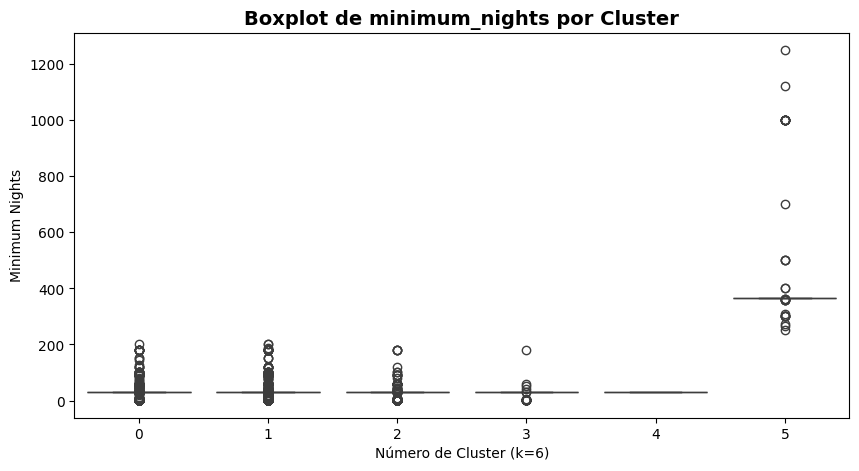

/tmp/ipython-input-1697992055.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_airbnb_final, x='Cluster', y=col, palette='tab10')


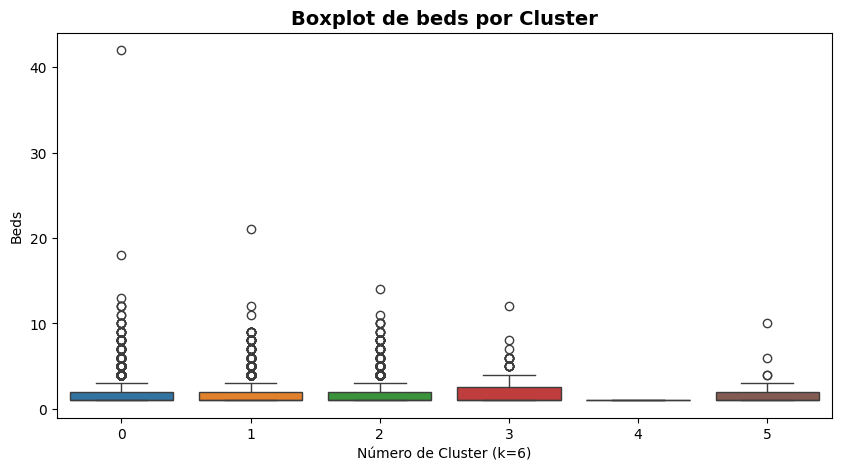

In [ ]:
columnas_cluster_num = [
    'price',
    'minimum_nights',
    'beds'
]

print("Boxplots para cada variable numérica separados por Clusters (k=7)")
print("-" * 60)

# 2. Hacemos un boxplot para cada variable, separada por cluster
for col in columnas_cluster_num:
    plt.figure(figsize=(10, 5))

    # Usamos sns.boxplot con 'Cluster' en el eje X y la variable en el eje Y
    sns.boxplot(data=df_airbnb_final, x='Cluster', y=col, palette='tab10')

    plt.title(f'Boxplot de {col} por Cluster', fontsize=14, fontweight='bold')
    plt.xlabel('Número de Cluster (k=6)')
    plt.ylabel(col.replace('_', ' ').title())

    plt.show()
    print("\n")

In [ ]:
import pandas as pd
import numpy as np

columnas_cluster_num = [
    'price',
    'minimum_nights',
    'reviews_per_month',
    'beds',
    'availability_365'
]

descriptive_stats_num = df_airbnb_final.groupby('Cluster')[columnas_cluster_num].mean().round(2)
print(descriptive_stats_num)

             price  minimum_nights  reviews_per_month  beds  availability_365
Cluster                                                                      
0           161.17           28.17               1.27  1.77            200.22
1           216.28           25.41               1.16  1.65            207.28
2           126.46           27.58               1.47  1.78            211.81
3           118.78           27.84               1.47  1.99            232.35
4        100000.00           30.00               0.70  1.00            355.50
5           183.55          455.93               0.62  1.80            243.12


Dado que no podemos ver bienlos clusters, vamos a eliminar el dato atipico mas alto para price, ya que este es el que no permite ver bien los clusters

In [ ]:
import pandas as pd

indice_a_eliminar = df_airbnb_final['price'].idxmax()

print("Registro con el precio más alto que será eliminado:")
print("-" * 50)
print(df_airbnb_final.loc[indice_a_eliminar])


df_airbnb_final.drop(indice_a_eliminar, inplace=True)

print("\n✅ Fila con el valor máximo de 'price' eliminada exitosamente.")
print(f"Nuevo número de filas en el DataFrame: {len(df_airbnb_final)}")

indice_a_eliminar = df_airbnb_final['price'].idxmax()

print("Registro con el precio más alto que será eliminado:")
print("-" * 50)
print(df_airbnb_final.loc[indice_a_eliminar])


df_airbnb_final.drop(indice_a_eliminar, inplace=True)

print("\n✅ Fila con el valor máximo de 'price' eliminada exitosamente.")
print(f"Nuevo número de filas en el DataFrame: {len(df_airbnb_final)}")

Registro con el precio más alto que será eliminado:
--------------------------------------------------
host_id                                    110361431
neighbourhood_group                         Brooklyn
neighbourhood                     Bedford-Stuyvesant
latitude                                    40.69085
longitude                                  -73.93806
room_type                               Private room
price                                       100000.0
minimum_nights                                  30.0
number_of_reviews                                 29
reviews_per_month                               0.96
calculated_host_listings_count                     2
availability_365                                 346
number_of_reviews_ltm                             10
license                                   No License
rating                                         4.48 
bedrooms                                           1
beds                                             

Ahora, volvemos a hacer los clusters y los analizaremos de nuevo, para ver si la exclusion de este dato ayuda a algo

In [ ]:
NUMERIC_COLS = [
    'price',
    'minimum_nights',
    'beds',
]

CATEGORICAL_COLS = [
    'neighbourhood_group'
]

imputer = SimpleImputer(strategy='mean')
df_airbnb_final[NUMERIC_COLS] = imputer.fit_transform(df_airbnb_final[NUMERIC_COLS])

X_categorical_encoded = pd.get_dummies(
    df_airbnb_final[CATEGORICAL_COLS],
    prefix=CATEGORICAL_COLS,
    drop_first=True
)

X_full = pd.concat(
    [df_airbnb_final[NUMERIC_COLS], X_categorical_encoded],
    axis=1
)

scaler = StandardScaler()

X_airbnb_scaled_array = scaler.fit_transform(X_full)


X_airbnb_scaled = pd.DataFrame(
    X_airbnb_scaled_array,
    columns=X_full.columns
)

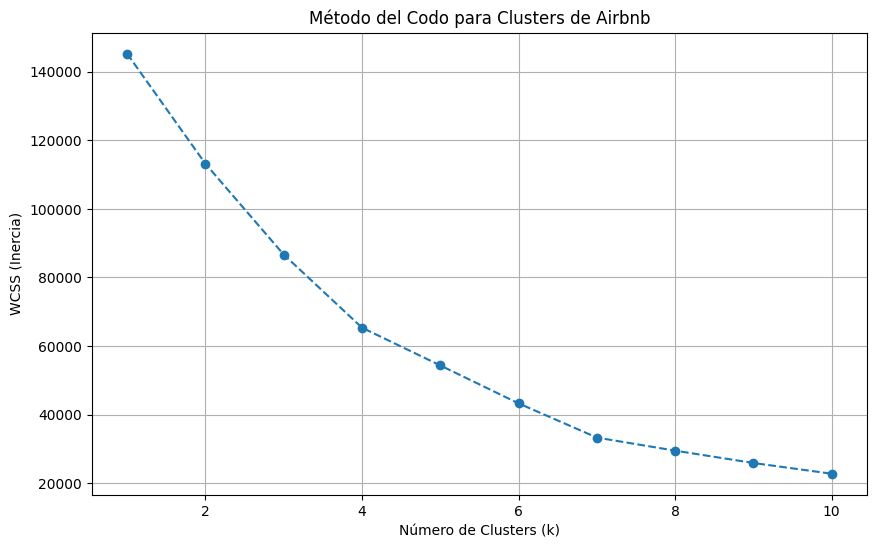

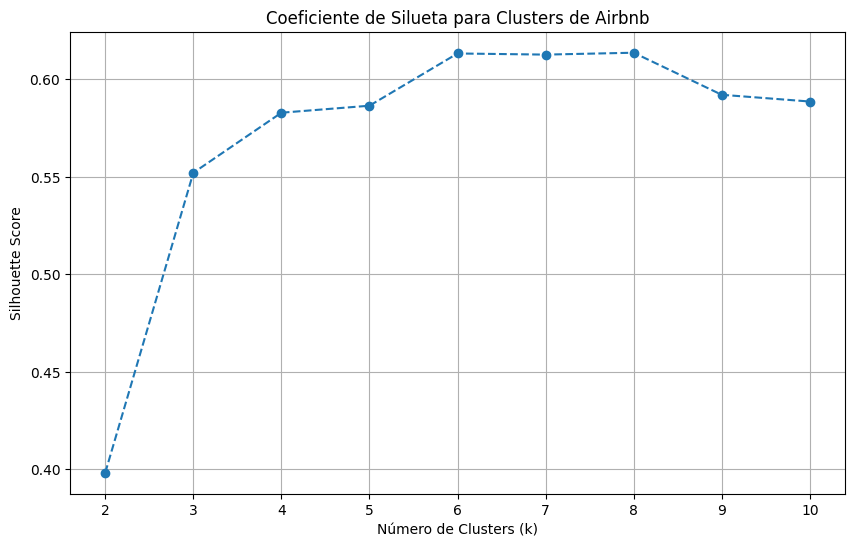

In [ ]:
wcss_airbnb = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
    kmeans.fit(X_airbnb_scaled)
    wcss_airbnb.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_range, wcss_airbnb, marker='o', linestyle='--')
plt.title('Método del Codo para Clusters de Airbnb')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('WCSS (Inercia)')
plt.grid(True)
plt.show()

sil_scores_airbnb = []
k_range_sil = range(2, 11)

for k in k_range_sil:
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
    kmeans.fit(X_airbnb_scaled)
    score = silhouette_score(X_airbnb_scaled, kmeans.labels_)
    sil_scores_airbnb.append(score)

plt.figure(figsize=(10, 6))
plt.plot(k_range_sil, sil_scores_airbnb, marker='o', linestyle='--')
plt.title('Coeficiente de Silueta para Clusters de Airbnb')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

In [ ]:
k_optimizado = 6


kmeans_final = KMeans(n_clusters=k_optimizado, init='k-means++', n_init=10, random_state=42)
kmeans_final.fit(X_airbnb_scaled)


df_airbnb_final['Cluster'] = kmeans_final.labels_

print("Ejemplo de las primeras 5 filas con la nueva columna 'Cluster':")
print(df_airbnb_final[['price', 'room_type', 'neighbourhood_group', 'Cluster']].head())

print("\nConteo de elementos por Cluster:")

cluster_counts = df_airbnb_final['Cluster'].value_counts().sort_index()
print(cluster_counts)

Ejemplo de las primeras 5 filas con la nueva columna 'Cluster':
   price        room_type neighbourhood_group  Cluster
0   55.0     Private room            Brooklyn        1
1  144.0  Entire home/apt           Manhattan        0
2  187.0  Entire home/apt           Manhattan        0
3  120.0     Private room           Manhattan        0
4   85.0  Entire home/apt           Manhattan        0

Conteo de elementos por Cluster:
Cluster
0    7610
1    8252
2     291
3    3645
4      82
5     876
Name: count, dtype: int64


Boxplots para cada variable numérica separados por Clusters (k=7)
------------------------------------------------------------


/tmp/ipython-input-1697992055.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_airbnb_final, x='Cluster', y=col, palette='tab10')


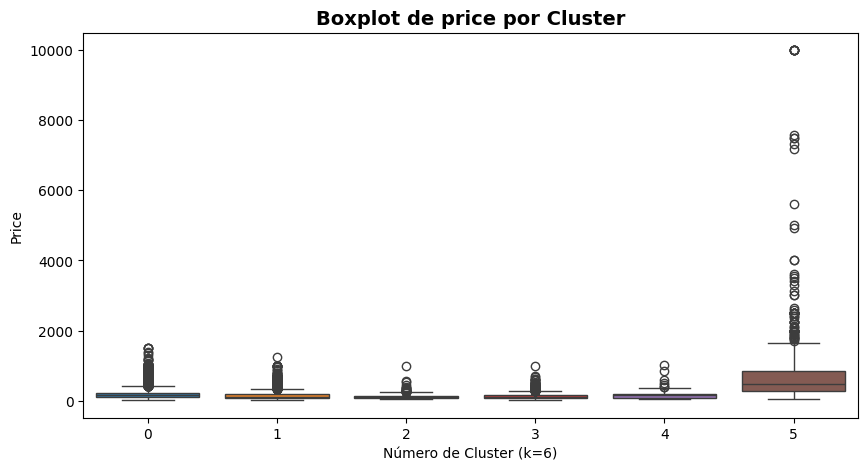

/tmp/ipython-input-1697992055.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_airbnb_final, x='Cluster', y=col, palette='tab10')


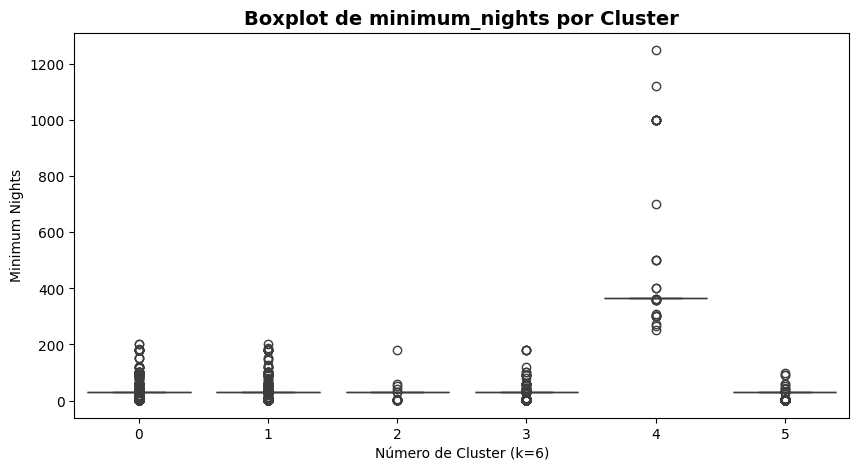

/tmp/ipython-input-1697992055.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_airbnb_final, x='Cluster', y=col, palette='tab10')


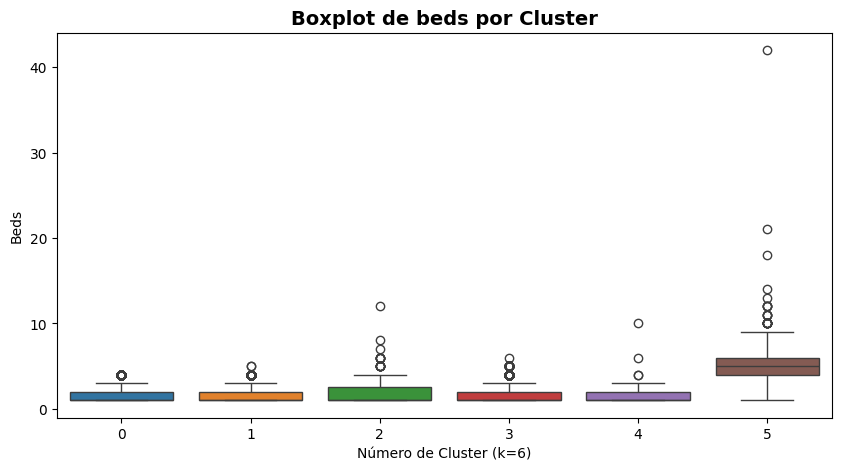

In [ ]:
columnas_cluster_num = [
    'price',
    'minimum_nights',
    'beds'
]

print("Boxplots para cada variable numérica separados por Clusters (k=7)")
print("-" * 60)

# 2. Hacemos un boxplot para cada variable, separada por cluster
for col in columnas_cluster_num:
    plt.figure(figsize=(10, 5))

    # Usamos sns.boxplot con 'Cluster' en el eje X y la variable en el eje Y
    sns.boxplot(data=df_airbnb_final, x='Cluster', y=col, palette='tab10')

    plt.title(f'Boxplot de {col} por Cluster', fontsize=14, fontweight='bold')
    plt.xlabel('Número de Cluster (k=6)')
    plt.ylabel(col.replace('_', ' ').title())

    plt.show()
    print("\n")

In [ ]:
!pip install -U kaleido

In [ ]:
import plotly.express as px
import pandas as pd
# Eliminamos 'import kaleido' ya que no se usa directamente aquí.

# Usamos k=6 según tu solicitud
print("Generando Gráfico Interactivo de Clusters SOBRE UN MAPA de Nueva York (k=6)...")
print("-" * 70)

fig_map = px.scatter_mapbox(
    df_airbnb_final,
    lat="latitude",
    lon="longitude",
    color=df_airbnb_final['Cluster'].astype(str),
    size='price',
    hover_name="room_type",
    hover_data=['price', 'minimum_nights', 'neighbourhood_group', 'Cluster'],
    zoom=10,
    title='Clusters de Airbnb Superpuestos en un Mapa de Nueva York (k=6)',
    mapbox_style="carto-positron",
    height=700,
    labels={
        "color": "Cluster",
        "latitude": "Latitud",
        "longitude": "Longitud",
        "price": "Precio"
    }
)

fig_map.show()

# ----------------------------------------------------
# CÓDIGO PARA GUARDAR
# ----------------------------------------------------

# 1. Guardar como Archivo HTML Interactivo
html_filename = "airbnb_clusters_mapa_interactivo_k6.html"
fig_map.write_html(html_filename)
print(f"\n✅ Gráfico interactivo guardado como: {html_filename}")


# 2. Guardar como Imagen Estática (PNG)
png_filename = "airbnb_clusters_mapa_estatico_k6.png"

try:
    # Esto requiere que el paquete 'kaleido' esté instalado (pip install kaleido)
    fig_map.write_image(png_filename, scale=2) # scale=2 mejora la resolución
    print(f"✅ Imagen estática guardada como: {png_filename}")
except Exception as e:
    # Si falla, informa al usuario qué pasó y cuál es la solución
    print(f"\n❌ Error al guardar como PNG. Asegúrate de que 'kaleido' esté instalado.")
    print(f"Detalle del error: {e}")


Generando Gráfico Interactivo de Clusters SOBRE UN MAPA de Nueva York (k=6)...
----------------------------------------------------------------------


/usr/local/lib/python3.12/dist-packages/kaleido/_sync_server.py:11: UserWarning:




This means that static image generation (e.g. `fig.write_image()`) will not work.

Please upgrade Plotly to version 6.1.1 or greater, or downgrade Kaleido to version 0.2.1.





✅ Gráfico interactivo guardado como: airbnb_clusters_mapa_interactivo_k6.html

❌ Error al guardar como PNG. Asegúrate de que 'kaleido' esté instalado.
Detalle del error: 
Image export using the "kaleido" engine requires the kaleido package,
which can be installed using pip:
    $ pip install -U kaleido



Saving mapa ny.jpg to mapa ny (2).jpg


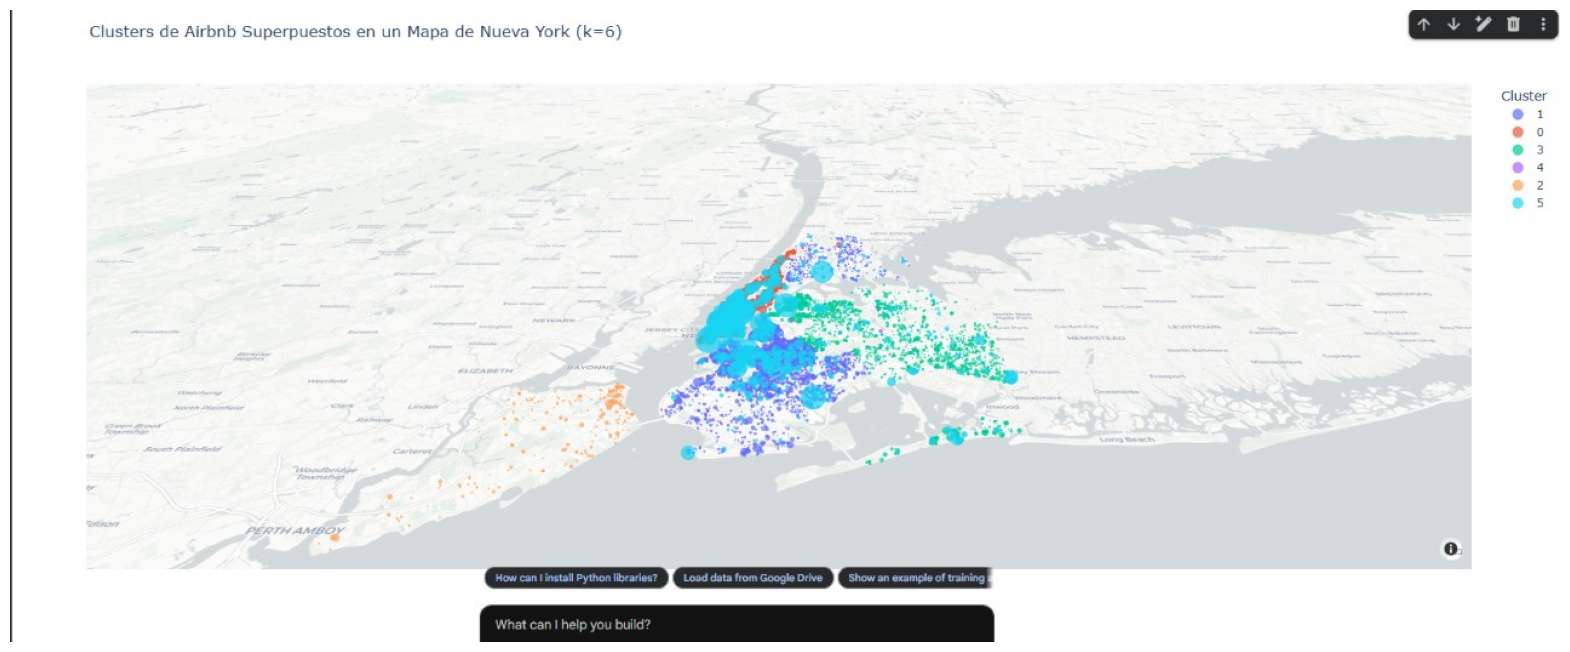

In [ ]:
from google.colab import files
from PIL import Image
import matplotlib.pyplot as plt

# Subir imagen desde tu PC
uploaded = files.upload()

# Obtener el nombre del archivo subido
filename = list(uploaded.keys())[0]

# Abrir la imagen
img = Image.open(filename)

# Mostrar la imagen más grande
plt.figure(figsize=(20, 20))  # Ajusta los valores (ancho, alto) a lo que necesites
plt.imshow(img)
plt.axis('off')
plt.show()



Dados el mapa anterior y la visualización 3d de los clusters, se puede ver que el clustering se esta haciendo mas que todo por los barrios de Nueva york.

El Cluster 0 describe las rentas en Airbnb con un precio moderado o promedio. Estos tienen un mínimo de noches muy variados, al igual que sus reseñas y tamaños de hospedajes. En su mayoría el cluster mantiene las rentas de Manhattan.

El Cluster 1 describe las rentas que hay en Brookly y en Bronx con un precio no muy alto para el estudio. La estancia minima para la mayoría de estos es de 30 días, sin embargo no excluyes estancias de 1 y 4 días para algunos.

El Cluster 2 muestra únicamente las rentas que se encuentran en la Isla al sur de la ciudad, esta muestra una varaición en el resto de los parámetros. Ademas, estas son las que mas camas tienen, por lo que se pueden decir que son los que tienen mayor ocupación en numero de personas.

El cluster 3 muestra todos los registros de Queens. Pero para este se ve un sector extra al sur de la ciudad, muy cerca a Brooklyn. Al igual, este mantiene una completa variación de precio, estancia minima y demás, pero este no contiene las rentas mas exclusivas de la ciudad

El cluster 4 Agrupa las rentas de toda la ciudad que cuentan con un mínimo de estancia superior a los 300 días. Este se ve repartido por todo el mapa, ya que este no cuenta con agrupamiento por barrio, si no por su estancia minima. Esta incluye algunos precios altos, que se pueden ver distinto al resto por su tamaño del punto en el mapa

El cluster 5, y el ultimo, agrupa las rentas exclusivas en la ciudad, ya que este tiene los precios mas altos de Nueva York. Podemos ver que estas rentas "exclusivas o de lujo" no hay en una region del mapa, que parece ser Staten Island

In [32]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
!sudo apt-get install texlive-xetex texlive-fonts-recommended -y

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
texlive-fonts-recommended is already the newest version (2021.20220204-1).
texlive-xetex is already the newest version (2021.20220204-1).
0 upgraded, 0 newly installed, 0 to remove and 41 not upgraded.


In [ ]:
!jupyter nbconvert --to PDF /content/drive/MyDrive/Clustering_MCG.ipynb

[NbConvertApp] Converting notebook /content/drive/MyDrive/Clustering_MCG.ipynb to PDF
/usr/local/share/jupyter/nbconvert/templates/latex/display_priority.j2:32: UserWarning: Your element with mimetype(s) dict_keys(['text/html']) is not able to be represented.
  ((*- endblock -*))
[NbConvertApp] Support files will be in Clustering_MCG_files/
[NbConvertApp] Making directory ./Clustering_MCG_files
[NbConvertApp] Writing 100729 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
